# ¡Hola Bryan! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Bryan completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de manipulación y visualización de datos.

Como sugerencia para fortalecer aún más tu análisis estadístico, sería conveniente incorporar la prueba de Levene antes de realizar comparaciones de medias, ya que esto asegurará que tus resultados sean más robustos y confiables.

Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-------

In [1]:
#importamos la librerías requeridas para el análisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Leemos los archivos y los asignamos a las diferentes variables.
companies = pd.read_csv('/datasets/project_sql_result_01.csv')
locations = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
# Verificamos los tipos de datos
print(companies.dtypes)
print(locations.dtypes)
print(weather.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [4]:
# Verificamos los primeros datos
print(companies.head())
print(locations.head())
print(weather.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [5]:
# verificamos que las columnas trips_amount y average_trips sean numéricas
companies['trips_amount'] = pd.to_numeric(companies['trips_amount'], errors='coerce')
locations['average_trips'] = pd.to_numeric(locations['average_trips'], errors='coerce')
print(companies['trips_amount'].dtype)
print(locations['average_trips'].dtype)

int64
float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `dtypes` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

In [6]:
# Asignamos el top 10 de lo viajes con mayor promedio de finalización de viajes
top10_locations = locations.sort_values(by='average_trips', ascending=False).head(10)
print(top10_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


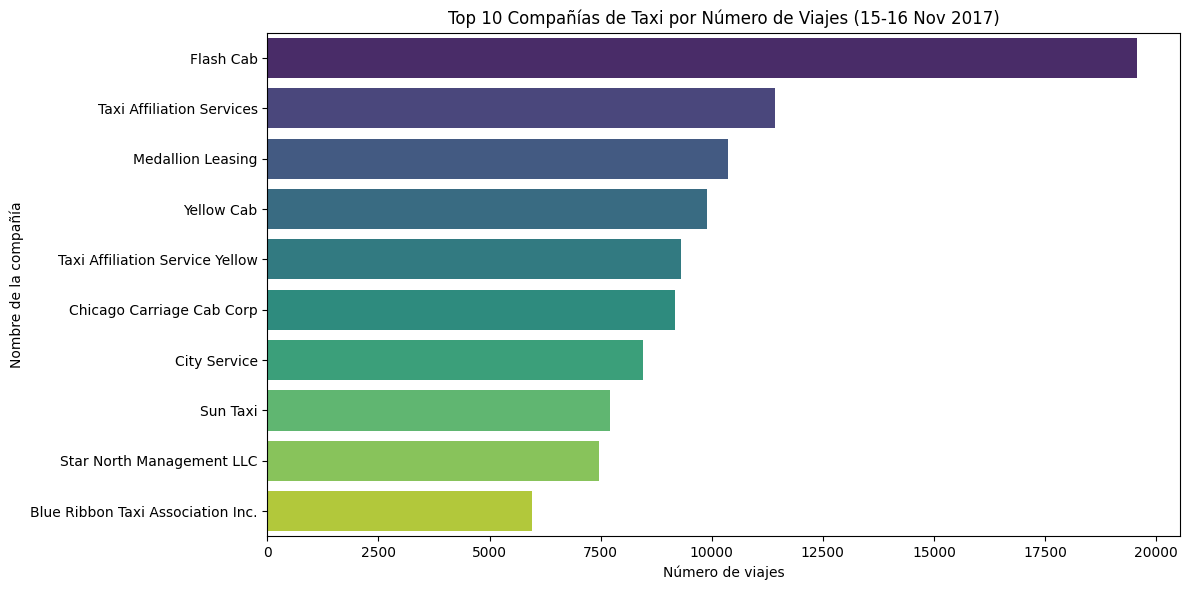

In [7]:
# Creación del Gráfico 1: Empresas de taxi y número de viajes
plt.figure(figsize=(12,6))
sns.barplot(data=companies.sort_values(by='trips_amount', ascending=False).head(10),
            x='trips_amount', y='company_name', palette='viridis')
plt.title('Top 10 Compañías de Taxi por Número de Viajes (15-16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Nombre de la compañía')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se ve claramente que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

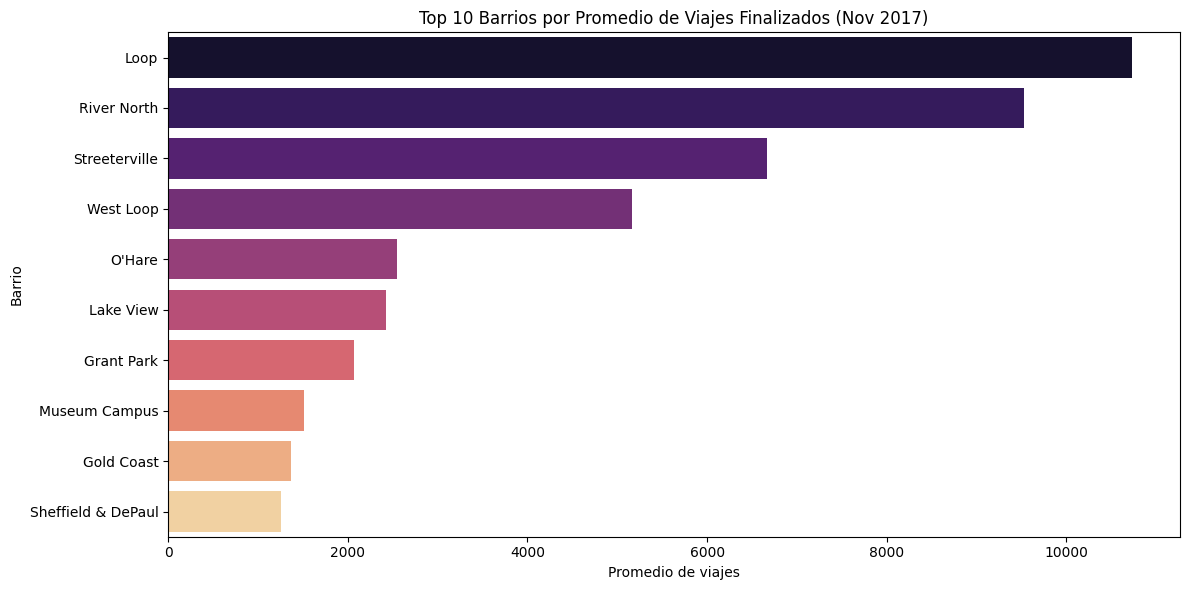

In [8]:
# Creación del Gráfico 2: Barrios con más finalizaciones
plt.figure(figsize=(12,6))
sns.barplot(data=top10_locations, x='average_trips', y='dropoff_location_name', palette='magma')
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados (Nov 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

Con la creación de los gráficos se puede observar que las empresas que dominan son:
-Flash cab
-Taxi affiliation service
-medallion leasing

Y que hay barrios especificos con alta demanda como destino final de los viajes como lo son: 
-Loop
-River North
-Streeterville

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

Paso 5.- Prueba de hipótesis.

In [9]:
# Convertimos start_ts a datetime
weather['start_ts'] = pd.to_datetime(weather['start_ts'])
print(weather['start_ts'].dtypes)

datetime64[ns]


In [10]:
# Filtramos solo los sábados
weather['weekday'] = weather['start_ts'].dt.dayofweek  # 5 = sábado
saturday_data = weather[weather['weekday'] == 5]
print(saturday_data)

                start_ts weather_conditions  duration_seconds  weekday
0    2017-11-25 16:00:00               Good            2410.0        5
1    2017-11-25 14:00:00               Good            1920.0        5
2    2017-11-25 12:00:00               Good            1543.0        5
3    2017-11-04 10:00:00               Good            2512.0        5
4    2017-11-11 07:00:00               Good            1440.0        5
...                  ...                ...               ...      ...
1063 2017-11-25 11:00:00               Good               0.0        5
1064 2017-11-11 10:00:00               Good            1318.0        5
1065 2017-11-11 13:00:00               Good            2100.0        5
1066 2017-11-11 08:00:00               Good            1380.0        5
1067 2017-11-04 16:00:00                Bad            2834.0        5

[1068 rows x 4 columns]


In [11]:
# Dividimos los días entre lluviosos y no lluviosos
rainy = saturday_data[saturday_data['weather_conditions'] == 'Bad']['duration_seconds']
clear = saturday_data[saturday_data['weather_conditions'] == 'Good']['duration_seconds']
print(rainy)
print(clear)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64
0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64


In [12]:
# Realizar prueba t de Student
alpha = 0.05
result = stats.ttest_ind(rainy, clear, equal_var=False)  # Welch’s t-test

print("\nHipótesis nula: la duración promedio de los viajes es igual entre sábados lluviosos y no lluviosos.")
print("Hipótesis alternativa: la duración promedio cambia en sábados lluviosos.")
print(f"p-valor = {result.pvalue:.5f}")

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente de diferencia.")


Hipótesis nula: la duración promedio de los viajes es igual entre sábados lluviosos y no lluviosos.
Hipótesis alternativa: la duración promedio cambia en sábados lluviosos.
p-valor = 0.00000
Rechazamos la hipótesis nula. Hay diferencias significativas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Bryan aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula, logrando comprobar que el clima sí afecta la duración de los viajes en Taxi

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la *prueba t* sea estadísticamente válida.

</div>
</div>